# <u>Methodologies II: Anomaly Detection</u>

### continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_lemonade_data
from wrangle import get_lower_and_upper_bounds

from cycler import cycler
plt.rcParams["figure.figsize"] = (13,5)

plt.rcParams['axes.facecolor']='#FFF'
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'b', 'y'])

import warnings
warnings.filterwarnings('ignore')

### Get Data

In [15]:
df = get_lemonade_data()

In [16]:
df.head()

,date,day,temperature,rainfall,flyers,price,sales,month
date,,,,,,,,
2017-01-01,1/1/17,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,1/2/17,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,1/3/17,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,1/4/17,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,1/5/17,Thursday,42.4,1.00,33,0.5,18,January


#### (1). Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 
    - Do these lower outliers make sense? 
    - Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. 
    - Do these upper outliers make sense? 
    - Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. 
    - Do these lower outliers make sense? 
    - Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. 
    - Do these upper outliers make sense? 
    - Which outliers should be kept?

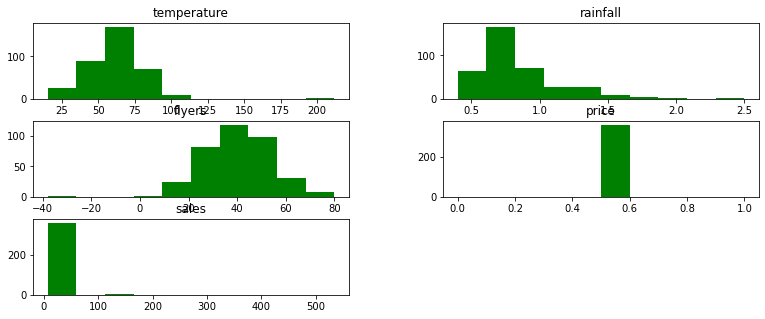

In [17]:
# Continuous var distribution

df.hist(grid = False)
None

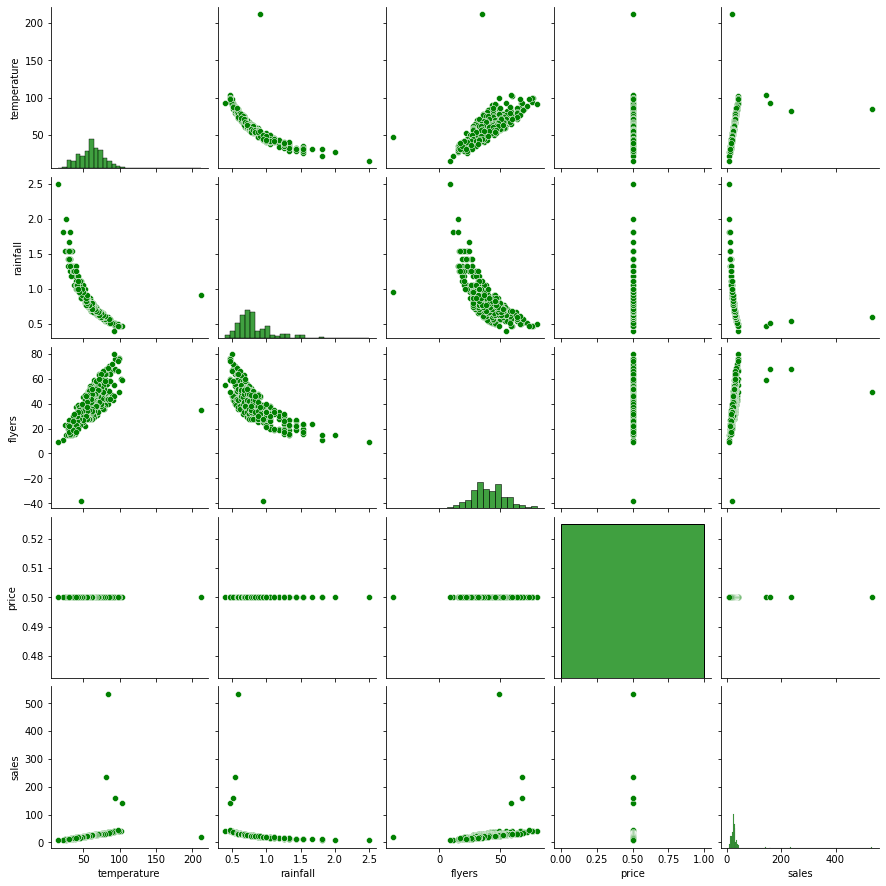

In [18]:
# Relations Plots
sns.pairplot(df)
None

### Call the lower-upper function to get the bounds

Flexible multiplier**


In [19]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        print(col+':')
        low_bound, up_bound = get_lower_and_upper_bounds(df[col])
        print(f'\tLower bound:---- {low_bound}\n\tUpper bound:---- {up_bound}\n')

    else:
        pass

temperature:
Enter value for multiplier: 1.5
	Lower bound:---- 16.700000000000003
	Upper bound:---- 104.7

rainfall:
Enter value for multiplier: 1.5
	Lower bound:---- 0.26
	Upper bound:---- 1.3

flyers:
Enter value for multiplier: 1.5
	Lower bound:---- 4.0
	Upper bound:---- 76.0

price:
Enter value for multiplier: 1.5
	Lower bound:---- 0.5
	Upper bound:---- 0.5

sales:
Enter value for multiplier: 1.5
	Lower bound:---- 5.0
	Upper bound:---- 45.0



### (2). Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

    - Do these make sense?
    - Should certain outliers be kept or removed?
    
-----------------    
- The "Empirical Rule" AKA "Three Sigma Rule" AKA 68–95–99.7 Rule
Assumes a normal distribution of the observed variable
Asserts that:
    - 68% of observations are within 1 standard deviation of the mean
    - 95% of observations are within 2 standard deviations of the mean
    - 99.7% of observations are within 3 standard deviations of the mean
- Is often used as a quick test for normality
- Is often erroneously applied to non-normally distributed data.
- Can be an oversimplified approach

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


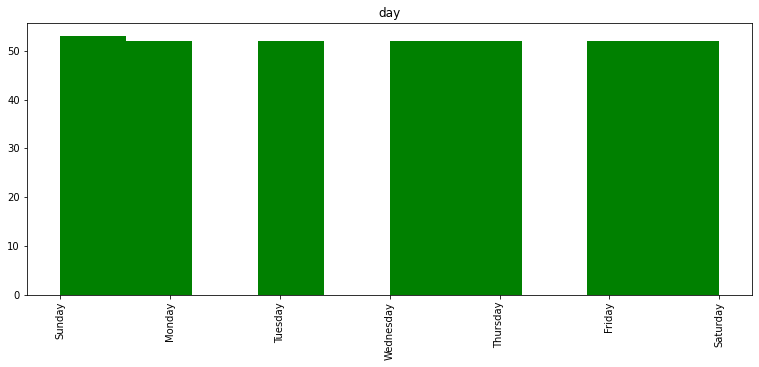

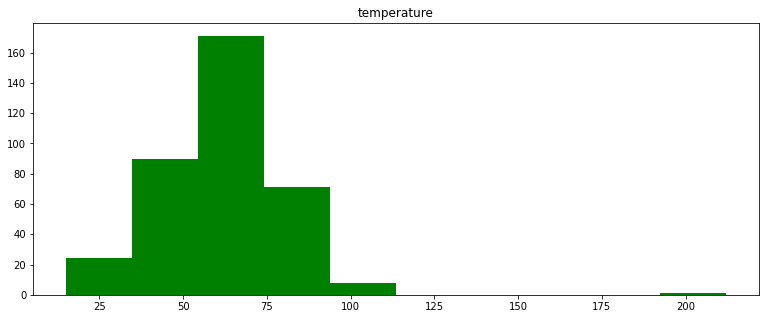

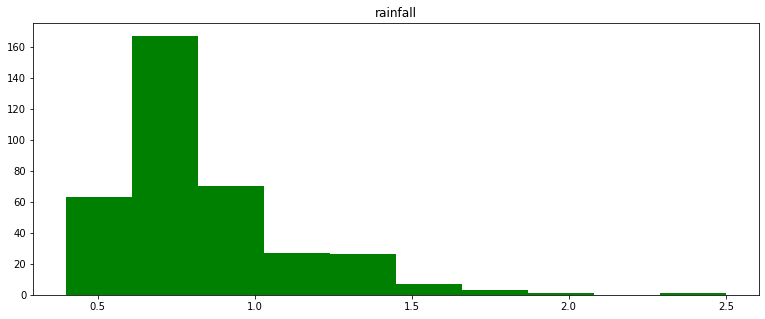

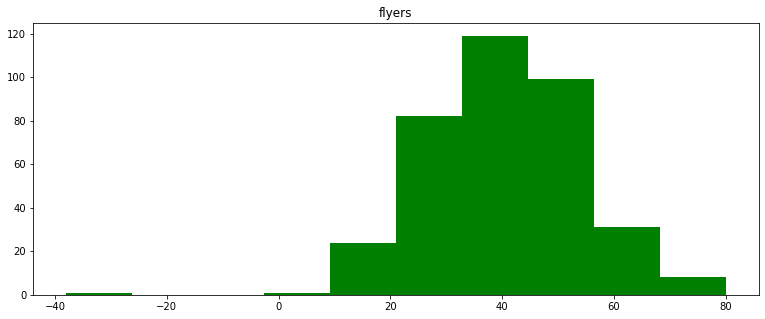

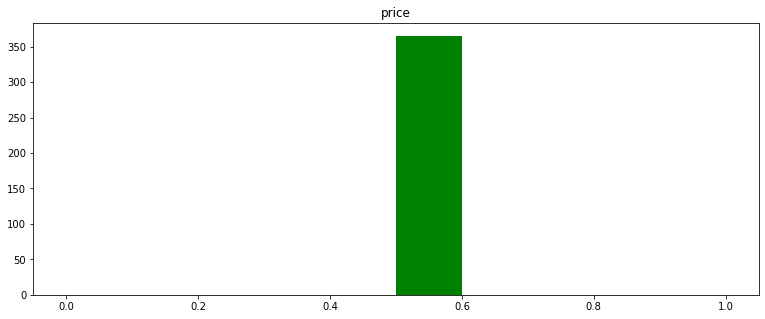

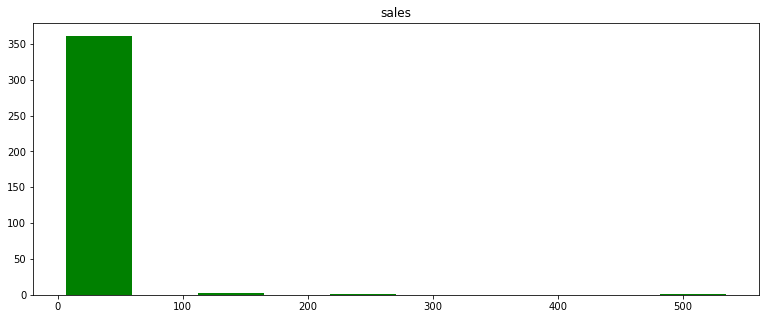

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


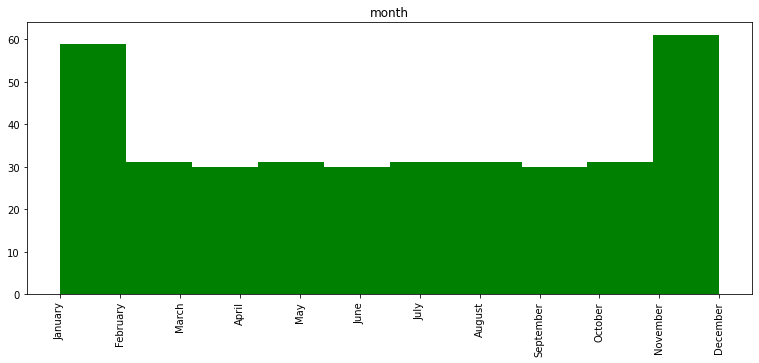

In [20]:
# Check All cols 

for col in df.columns[1:]:
    plt.title(col)
    if (col == 'month') | (col == 'day'):
        plt.xticks(rotation = 90)    
    plt.hist(df[col])
    plt.show()

#### Rainfall

In [22]:
df['z_score_rainfall'] = (df['rainfall'] - df['rainfall'].mean()) / df['rainfall'].std()
df.head()

,date,day,temperature,rainfall,flyers,price,sales,month,z_score_rainfall
date,,,,,,,,,
2017-01-01,1/1/17,Sunday,27.0,2.00,15,0.5,10,January,4.286488
2017-01-02,1/2/17,Monday,28.9,1.33,15,0.5,13,January,1.840253
2017-01-03,1/3/17,Tuesday,34.5,1.33,27,0.5,15,January,1.840253
2017-01-04,1/4/17,Wednesday,44.1,1.05,28,0.5,17,January,0.817946
2017-01-05,1/5/17,Thursday,42.4,1.00,33,0.5,18,January,0.635391


### Abnormal Rainfall?

In [28]:
# Finds all of the observations two standard deviations or more.
df[df.z_score_rainfall.abs() > 2]


,date,day,temperature,rainfall,flyers,price,sales,month,z_score_rainfall
date,,,,,,,,,
2017-01-01,1/1/17,Sunday,27.0,2.00,15,0.5,10,January,4.286488
2017-01-06,1/6/17,Friday,25.3,1.54,23,0.5,11,January,2.606983
2017-01-07,1/7/17,Saturday,32.9,1.54,19,0.5,13,January,2.606983
2017-01-11,1/11/17,Wednesday,32.6,1.54,23,0.5,12,January,2.606983
2017-01-16,1/16/17,Monday,30.6,1.67,24,0.5,12,January,3.081626
...,...,...,...,...,...,...,...,...,...
2017-12-18,12/18/17,Monday,30.9,1.43,27,0.5,13,December,2.205363
2017-12-22,12/22/17,Friday,30.9,1.54,17,0.5,13,December,2.606983
2017-12-26,12/26/17,Tuesday,28.9,1.43,23,0.5,13,December,2.205363


### Flyers

In [30]:
df['z_score_flyers'] = (df['flyers'] - df['flyers'].mean()) / df['flyers'].std()
df.head()

,date,day,temperature,rainfall,flyers,price,sales,month,z_score_rainfall,z_score_flyers
date,,,,,,,,,,
2017-01-01,1/1/17,Sunday,27.0,2.00,15,0.5,10,January,4.286488,-1.820927
2017-01-02,1/2/17,Monday,28.9,1.33,15,0.5,13,January,1.840253,-1.820927
2017-01-03,1/3/17,Tuesday,34.5,1.33,27,0.5,15,January,1.840253,-0.950507
2017-01-04,1/4/17,Wednesday,44.1,1.05,28,0.5,17,January,0.817946,-0.877972
2017-01-05,1/5/17,Thursday,42.4,1.00,33,0.5,18,January,0.635391,-0.515297


### Flyers abnoramal?

In [31]:
# Finds all of the observations two standard deviations or more.
df[df.z_score_flyers.abs() > 2]

,date,day,temperature,rainfall,flyers,price,sales,month,z_score_rainfall,z_score_flyers
date,,,,,,,,,,
2017-06-16,6/16/17,Friday,99.3,0.47,77,0.5,41,June,-1.299691,2.676244
2017-06-20,6/20/17,Tuesday,85.1,0.54,70,0.5,37,June,-1.044114,2.168499
2017-06-21,6/21/17,Wednesday,94.3,0.47,76,0.5,41,June,-1.299691,2.603709
2017-07-02,7/2/17,Sunday,93.4,0.51,68,0.5,158,July,-1.153647,2.023429
2017-07-03,7/3/17,Monday,81.5,0.54,68,0.5,235,July,-1.044114,2.023429
...,...,...,...,...,...,...,...,...,...,...
2017-07-24,7/24/17,Monday,83.5,0.57,69,0.5,35,July,-0.934581,2.095964
2017-07-27,7/27/17,Thursday,97.9,0.47,74,0.5,43,July,-1.299691,2.458639
2017-11-21,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836,-5.665283


#### (3). Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

### Rainfall

In [34]:
# Finds all of the observations three standard deviations or more
df[df.z_score_rainfall.abs() > 3]

,date,day,temperature,rainfall,flyers,price,sales,month,z_score_rainfall,z_score_flyers
date,,,,,,,,,,
2017-01-01,1/1/17,Sunday,27.0,2.00,15,0.5,10,January,4.286488,-1.820927
2017-01-16,1/16/17,Monday,30.6,1.67,24,0.5,12,January,3.081626,-1.168112
2017-12-05,12/5/17,Tuesday,22.0,1.82,11,0.5,10,December,3.629291,-2.111067
2017-12-10,12/10/17,Sunday,31.3,1.82,15,0.5,11,December,3.629291,-1.820927
2017-12-31,12/31/17,Sunday,15.1,2.50,9,0.5,7,December,6.112037,-2.256137


### Flyers

In [33]:
# Finds all of the observations three standard deviations or more
df[df.z_score_flyers.abs() > 3]

,date,day,temperature,rainfall,flyers,price,sales,month,z_score_rainfall,z_score_flyers
date,,,,,,,,,,
2017-11-21,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836,-5.665283
